#DECISION TREE CLASSIFICATIOM MODEL

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

drive.mount('/content/drive')
df=pd.read_csv('/content/drive/My Drive/Data Mining in Science/praktikum/3. Klasifikasi/iris_species.csv').dropna()


df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#Data preprocessing

In [0]:
# Encoding the categorical variable, 'Species'

lable_encoder = LabelEncoder()
df.iloc[:, 5] = lable_encoder.fit_transform(df.iloc[:, 5])

In [0]:
X = df.iloc[:, 1:3].values 
y = df.iloc[:, 5].values


## Feature scaling is not required for Decision Trees because it does not use Euclidean Distance. Models based on some kind of distance are required to be scaled


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# we're scaling here in order to visualize it easily
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) # Mengambil data test 25%
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

#Creating the classification tree model

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#Prediction with the model

In [14]:
y_pred = clf.predict(X_test)
y_pred

array([1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2])

#Computing model accuracy

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 1,  8,  7],
       [ 0,  6,  3]])

In [13]:
#Hint: The diagonal elements gives the correct predictions for each class of the dependent variable, thus their sum gives the total correct predictions

correct_predictions = np.trace(cm)
total_sample = np.sum(cm)
accuracy = correct_predictions/total_sample*100

print("Prediction accuracy of the Decision Tree model is {} percent".format(accuracy))

Prediction accuracy of the Decision Tree model is 63.1578947368421 percent


#Visualizing model result

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


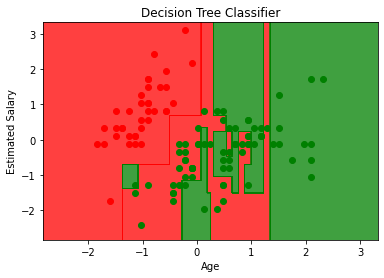

In [7]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X_set
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Decision Tree Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()